In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

# Number of features
num_features = X.shape[1]

# Number of entries
num_entries = X.shape[0]

# Identify categorical and quantitative features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
quantitative_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Number of categorical and quantitative features
num_categorical = len(categorical_features)
num_numerical = len(quantitative_features)

print(f"Number of Features: {num_features}")
print(f"Number of Entries: {num_entries}")
print(f"Number of Categorical Features: {num_categorical}")
print(f"Number of Numerical Features: {num_numerical}")

num_classes = y.nunique()
print(f"Number of Classes: {num_classes}")

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

if False:
    # 1. Visualizing Data Distribution for Numerical Features
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(X[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # 2. Visualizing Categorical Features
    categorical_features = X.select_dtypes(include=["object"]).columns

    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(y=X[feature])
        plt.title(f'Distribution of {feature}')
        plt.show()

# 3. Visualizing Relationships (taking two features as an example, e.g., "Feature1" and "Feature2")
# You can replace 'Feature1' and 'Feature2' with actual feature names from your dataset.
# sns.scatterplot(x='Feature1', y='Feature2', data=X)
# plt.title('Feature1 vs. Feature2')
# plt.show()


In [3]:

import scipy
print(scipy.__file__)
from ucimlrepo import fetch_ucirepo 
from sklearn.feature_extraction import FeatureHasher

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
X = statlog_german_credit_data.data.features.copy()  # Create an explicit copy

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Calculate the number of slots available for hashing
slots_available = len(categorical_features)

# Determine the number of hash buckets for each categorical feature
hash_buckets = slots_available // len(categorical_features)

# Apply feature hashing with the calculated number of hash buckets
for feature in categorical_features:
    hasher = FeatureHasher(n_features=hash_buckets, input_type='string')
    
    # Wrap each sample in a list to make it an iterable of strings
    hashed_features = hasher.transform(X[feature].astype(str).apply(lambda x: [x])).toarray()
    
    # Drop the original column from X
    X.drop(columns=[feature], inplace=True)  # Use columns parameter to be explicit
    
    # Add the hashed features to X
    for i in range(hashed_features.shape[1]):
        X.loc[:, f"{feature}_hashed_{i}"] = hashed_features[:, i]  # Use loc for assignment


# Number of features after hashing
num_features_after_hashing = X.shape[1]

print(f"Number of Features After Hashing: {num_features_after_hashing}")


c:\Users\Miha\anaconda3\envs\evolver310\lib\site-packages\scipy\__init__.py
Number of Features After Hashing: 20


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMax scaling to all features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, but it can make further operations easier)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display the normalized data
print(X.head())


   Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0    0.029412    0.050567    1.000000     1.000000     0.857143     0.333333   
1    0.647059    0.313690    0.333333     0.333333     0.053571     0.000000   
2    0.117647    0.101574    0.333333     0.666667     0.535714     0.000000   
3    0.558824    0.419941    0.333333     1.000000     0.464286     0.000000   
4    0.294118    0.254209    0.666667     1.000000     0.607143     0.333333   

   Attribute18  Attribute1_hashed_0  Attribute3_hashed_0  Attribute4_hashed_0  \
0          0.0                  0.0                  1.0                  0.0   
1          0.0                  0.0                  0.0                  0.0   
2          1.0                  0.0                  1.0                  1.0   
3          1.0                  0.0                  0.0                  0.0   
4          1.0                  0.0                  0.0                  1.0   

   Attribute6_hashed_0  Attribut

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for the first few columns
for col in X.columns[:20]:
    plt.figure(figsize=(8, 5))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import logging
import os

In [6]:
class ClusterOps:
    def __init__(self, parent):
        self.parent = parent
        self.device = parent.device
        self.feature_dim = parent.feature_dim
        self.S_0 = parent.S_0
        
        self.Gamma_max = torch.exp(-torch.tensor(parent.num_sigma, dtype=torch.float32, device=self.device)**2)
                
    def _add_new_cluster(self, z, label):
        self.parent.c += 1
        self.parent.n = torch.cat((self.parent.n, torch.tensor([1], dtype=torch.int64, device=self.device)))
        self.parent.mu.append(torch.nn.Parameter(z.clone().to(self.device), requires_grad=True))
        initial_cov = self.S_0 * torch.eye(self.feature_dim, device=self.device)
        self.parent.S.append(torch.nn.Parameter(initial_cov, requires_grad=True))
        initial_cov_inv = self.parent.math_ops._compute_covariance_inverse(initial_cov)
        self.parent.S_inv.append(torch.nn.Parameter(initial_cov_inv, requires_grad=True))
        self.parent.cluster_labels = torch.cat((self.parent.cluster_labels, torch.tensor([label], dtype=torch.int64, device=self.device)))
        if label not in self.parent.label_to_clusters:
            self.parent.label_to_clusters[label] = torch.empty(0, dtype=torch.int64, device=self.device)
        self.parent.label_to_clusters[label] = torch.cat((self.parent.label_to_clusters[label], torch.tensor([self.parent.c - 1], dtype=torch.int64, device=self.device)))
        self.parent.Gamma = torch.cat((self.parent.Gamma, torch.tensor([1.0], dtype=torch.float32, device=self.device)))
        
        return
    
    def _increment_cluster(self, z, j, label):
        assert label == self.parent.cluster_labels[j], "Mismatched label for cluster increment"
        if self.parent.enable_debugging and (j >= len(self.parent.mu) or j < 0):
            logging.warning(f"Warning rule increment! Invalid cluster index: {j}. Valid indices are between 0 and {len(self.parent.mu)-1}.")
        
        e = z - self.parent.mu[j]
        self.parent.mu[j].data = self.parent.mu[j] + 1 / (1 + self.parent.n[j]) * e
        self.parent.S[j].data = self.parent.S[j] + e.view(-1, 1) @ (z - self.parent.mu[j]).view(1, -1)
        self.parent.n[j] = self.parent.n[j] + 1
        self.parent.math_ops._update_inverse_covariance(j)
        
        return

    def increment_or_add_cluster(self, z, label):

        self.parent.matching_clusters = torch.where(self.parent.cluster_labels == label)[0] 
        if len([self.parent.Gamma[i] for i in self.parent.matching_clusters]) == 0:
            self._add_new_cluster(z, label)
            logging.info(f"Info. Added new cluster for label {label} due to no matching clusters. Total clusters now: {self.parent.c}")
            return torch.tensor([1.0], device=self.parent.device)
        
        n_mean = torch.median(torch.tensor(self.parent.n, dtype=torch.float32, device=self.parent.device))
        beta = 1.0
        
        matching_clusters_tensor = torch.tensor([i for i, cluster_label in enumerate(self.parent.cluster_labels) if label == cluster_label], device=self.parent.device)
        
        filtered_n = [self.parent.n[i] for i in matching_clusters_tensor]
        weights = torch.sigmoid(beta * (n_mean - torch.tensor(filtered_n, dtype=torch.float32, device=self.parent.device)))
        matching_values = torch.tensor([self.parent.Gamma[i] for i in matching_clusters_tensor], dtype=torch.float32, device=self.parent.device) * weights
        _, relative_j = torch.max(matching_values, dim=0)
        j = matching_clusters_tensor[relative_j].item()  # Map relative index back to full list of clusters
        
        if self.parent.enable_adding and (self.parent.Gamma[j] <= self.Gamma_max):
            self._add_new_cluster(z, label)
            logging.info(f"Info. Added new cluster for label {label} due to low Gamma value. Total clusters now: {self.parent.c}")
        else:
            self._increment_cluster(z, j, label)
            
        return
        
    def perform_merge(self, kappa, kappa_min, Sigma_ij, mu_ij, n_ij):
        i, j = (kappa == kappa_min).nonzero(as_tuple=True)

        # Display if there are more than one set of values for i and j
        if len(i) > 1 or len(j) > 1:
            if self.parent.enable_debugging: 
                logging.warning(f"Warning merging! Multiple minimum kappa values detected. i: {i}, j: {j}")
            i, j = i[0], j[0]

        # Start plotting BEFORE the merge
        if self.parent.enable_debugging: 
            plt.figure(figsize=(6, 6))
            self.plot_cluster(i, 'Cluster i (Before)', 'blue')
            self.plot_cluster(j, 'Cluster j (Before)', 'red')
            self.parent.mu[i].data = mu_ij[:, i, j].squeeze()
            self.parent.S[i].data = (Sigma_ij[:, :, i, j] * n_ij[i, j]).squeeze()
            self.parent.n[i] = int(n_ij[i, j].item())
            self.parent.math_ops._update_inverse_covariance(i)

        # Check if n_ij[i, j] is an integer
        if not torch.equal(n_ij[i, j], torch.floor(n_ij[i, j])):
            logging.warning(f"Warning merging! Expected n_ij[{i}, {j}] to be an integer, but got {n_ij[i, j].item()} instead.")

        self.parent.n = torch.cat((self.parent.n[:j], self.parent.n[j+1:]))
        self.parent.mu = torch.nn.ParameterList([self.parent.mu[k] for k in range(len(self.parent.mu)) if k != j])
        self.parent.S = torch.nn.ParameterList([self.parent.S[k] for k in range(len(self.parent.S)) if k != j])
        self.parent.S_inv = torch.nn.ParameterList([self.parent.S_inv[k] for k in range(len(self.parent.S_inv)) if k != j])
        self.parent.cluster_labels = torch.cat((self.parent.cluster_labels[:j], self.parent.cluster_labels[j+1:]))
        self.parent.c -= 1  # Update the number of clusters

        # Retrieve the label for the clusters being merged
        scalar_cluster_label = self.parent.cluster_labels[i].item()

        # Update label_to_clusters to reflect the merge
        if scalar_cluster_label in self.parent.label_to_clusters:
            self.parent.label_to_clusters[scalar_cluster_label] = torch.cat((self.parent.label_to_clusters[scalar_cluster_label][:j], self.parent.label_to_clusters[scalar_cluster_label][j+1:]))
            for label, cluster_indices in self.parent.label_to_clusters.items():
                self.parent.label_to_clusters[label] = torch.where(cluster_indices > j, cluster_indices - 1, cluster_indices)
 
        # Visualize the clusters after merging
        if self.parent.enable_debugging:
            self.plot_cluster(i, 'Merged Cluster (After)', 'green', alpha=0.5)

            # Set the title
            plt.title(f"Clusters Before & After Merging: {i} and {j}")

            # Save the figure
            output_dir = 'Merging'
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            filename = f"merge_plot_{int(i)}_and_{int(j)}.png"
            filepath = os.path.join(output_dir, filename)
            plt.savefig(filepath)

            # Close the figure
            plt.close()

        return
        
    def plot_cluster(self, index, label, color, alpha=1):
        """Helper function to plot a cluster given its index."""
        mu = self.parent.mu[index].cpu().detach().numpy()
        S = self.parent.S[index].cpu().detach().numpy()/self.parent.n[index].cpu().detach().numpy()

        # Only use the first two dimensions of mu and S
        mu_2d = mu[:2]
        S_2d = S[:2, :2]

        plt.scatter(mu_2d[0], mu_2d[1], s=100, marker='x', color=color, label=label, alpha=alpha)

        # Assuming 2D data, plot ellipse for the covariance matrix
        vals, vecs = np.linalg.eigh(S_2d)
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 3 * np.sqrt(vals)
        ell = Ellipse(xy=mu_2d, width=width, height=height, angle=angle, edgecolor=color, lw=2, facecolor='none', alpha=alpha)
        plt.gca().add_patch(ell)


    def compute_cluster_parameters(self, matching_clusters):
        """
        Function to compute cluster parameters like combined sizes, means, covariances, and volumes 
        between pairs of clusters in the provided set of matching clusters.
        
        Parameters:
        - matching_clusters: List of cluster indices to be compared
        
        Returns:
        - V: Tensor containing volume values for all cluster pairs
        - Sigma_ij: Tensor containing covariance matrices for all cluster pairs
        - mu_ij: Tensor containing combined means for all cluster pairs
        - n_ij: Tensor containing combined cluster sizes for all cluster pairs
        """

        # Initialization of tensors for volumes, inter-cluster covariance matrices, means, and combined cluster sizes
        V = torch.full((self.parent.c, self.parent.c), float('nan'), device=self.parent.device)
        Sigma_ij = torch.zeros(self.parent.feature_dim, self.parent.feature_dim, self.parent.c, self.parent.c, device=self.parent.device)
        mu_ij = torch.zeros(self.parent.feature_dim, self.parent.c, self.parent.c, device=self.parent.device)
        n_ij = torch.zeros(self.parent.c, self.parent.c, device=self.parent.device)
        
        comparisons_made = 0  # Counter for the number of cluster comparisons made
        
        # Iterate through each cluster in matching clusters
        for i in matching_clusters:
            # Check if cluster i's weight is above a threshold and compute its volume
            if self.parent.Gamma[i] > np.exp(-((self.parent.num_sigma + 1)**2)):
                V[i, i] = torch.prod(torch.sqrt(torch.linalg.eig(self.parent.S[i] / self.parent.n[i]).eigenvalues.real))
                
                # Compute parameters for all other clusters in comparison to cluster i
                for j in matching_clusters:
                    if j == i or self.parent.Gamma[j] <= np.exp(-((self.parent.num_sigma + 1)**2)): continue
                    
                    comparisons_made += 1  # Update counter
                        
                    # Calculate combined size, mean, and covariance matrix for clusters i and j
                    n_ij[i, j] = self.parent.n[i] + self.parent.n[j]
                    mu_ij[:, i, j] = (self.parent.n[i] * self.parent.mu[i] + self.parent.n[j] * self.parent.mu[j]) / n_ij[i, j]
                    ZiTZi = (self.parent.n[i] - 1) * (1 / self.parent.n[i]) * self.parent.S[i] + torch.diag(self.parent.mu[i]) @ torch.ones(self.parent.feature_dim, self.parent.feature_dim, device=self.parent.device) @ torch.diag(self.parent.mu[i])
                    ZjTZj = (self.parent.n[j] - 1) * (1 / self.parent.n[j]) * self.parent.S[j] + torch.diag(self.parent.mu[j]) @ torch.ones(self.parent.feature_dim, self.parent.feature_dim, device=self.parent.device) @ torch.diag(self.parent.mu[j])
                    Sigma_ij[:, :, i, j] = (1 / (n_ij[i, j] - 1)) * (ZiTZi + ZjTZj - torch.diag(mu_ij[:, i, j]) @ torch.ones(self.parent.feature_dim, self.parent.feature_dim, device=self.parent.device) @ torch.diag(mu_ij[:, i, j]))
                    
                    # Calculate volume based on the eigenvalues and check for non-positive definiteness
                    eigenvalues = torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real
                    V[i, j] = self.parent.math_ops.V_factor * torch.prod(eigenvalues)
                    if torch.any(eigenvalues <= 1e-8) or V[i, j] <= 1e-8: V[i, j] = float('inf')

        # Validate cluster parameters if debugging is enabled
        if self.parent.enable_debugging:
            self.validate_cluster_parameters(Sigma_ij, mu_ij, n_ij, V, matching_clusters)

        return V, Sigma_ij, mu_ij, n_ij

    def validate_cluster_parameters(self, Sigma_ij, mu_ij, n_ij, V, matching_clusters):
        """Function to validate various computed cluster parameters."""

        # Check if individual covariance matrices are positive semi-definite
        for i in matching_clusters:
            eigenvalues_i = torch.linalg.eigvalsh(self.parent.S[i])
            if torch.any(eigenvalues_i < 0):
                logging.warning(f"Warning! Covariance matrix for cluster {i} is not positive semi-definite. Eigenvalues: {eigenvalues_i}")

        # Check if Sigma_ij matrices are positive semi-definite
        for i in matching_clusters:
            for j in matching_clusters:
                if i != j:
                    try:
                        eigenvalues_ij = torch.linalg.eigvalsh(Sigma_ij[:, :, i, j])
                    except RuntimeError as e:
                        # Log the error for debugging
                        logging.warning(f"Failed to compute eigenvalues for Sigma_ij between clusters {i}-{j}. Error: {str(e)}")
                        
        # Check if the number of samples are integers
        if not torch.equal(n_ij, torch.round(n_ij)):
            logging.warning(f"Warning for merging! n_ij contains non-integer values: {n_ij}")
        
        # Check if the volume is positive
        if torch.any(V <= 0):
            logging.warning(f"Warning for merging! Volume V contains non-positive values: {V}") 
        if V[i, j] < 0:
            logging.warning(f"Negative volume for clusters {i}-{j}. Sigma_ij: {Sigma_ij[:, :, i, j]}, Eigenvalues: {torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real}")
        elif torch.isnan(V[i, j]):
            logging.warning(f"NaN volume for clusters {i}-{j}. Sigma_ij: {Sigma_ij[:, :, i, j]}, Eigenvalues: {torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real}")
            
        # Check if Gamma values are within a valid range (0 to 1, for example, if it's a probability)
        if torch.any(self.parent.Gamma < 0) or torch.any(self.parent.Gamma > 1):
            logging.warning(f"Warning for merging! Gamma values are out of expected range: {self.parent.Gamma}")
        
        # Check matrix shapes
        if Sigma_ij.shape != (self.parent.feature_dim, self.parent.feature_dim, self.parent.c, self.parent.c):
            logging.warning(f"Warning for merging! Unexpected shape for Sigma_ij: {Sigma_ij.shape}")
        if mu_ij.shape != (self.parent.feature_dim, self.parent.c, self.parent.c):
            logging.warning(f"Warning for merging! Unexpected shape for mu_ij: {mu_ij.shape}")
        if n_ij.shape != (self.parent.c, self.parent.c):
            logging.warning(f"Warning for merging! Unexpected shape for n_ij: {n_ij.shape}")
            
    def merging_mechanism(self, label, max_iterations=100):
        iteration = 0
        merge_happened = True  # initial condition to enter the loop

        while merge_happened and iteration < max_iterations:
            merge_happened = self.merge_clusters(label)
            iteration += 1

    def merge_clusters(self, label):
        if not self.parent.enable_merging:
            return False

        matching_clusters = torch.where(self.parent.cluster_labels == label)[0]

        # If the number of matching clusters is below 2, return without merging
        if self.parent.enable_debugging and (len(matching_clusters) < self.parent.c_min):
            logging.info(f"Info. Number of matching clusters ({len(matching_clusters)}) is less than {self.parent.c_min}. No merging will be performed.")
            return False

        V, Sigma_ij, mu_ij, n_ij = self.compute_cluster_parameters(matching_clusters)
        kappa = self.compute_kappa_matrix(V)
        kappa_min = torch.min(kappa[kappa == kappa])

        if kappa_min < self.parent.kappa_join:
            self.perform_merge(kappa, kappa_min, Sigma_ij, mu_ij, n_ij)
            logging.info(f"Info. Clusters merged. Total clusters now: {self.parent.c}")
            
            # Update matching_clusters after merge
            self.parent.label_to_clusters[label] = torch.where(self.parent.cluster_labels == label)[0]
            
            return True  # A merge happened

        return False  # No merge happened

        
    def compute_kappa_matrix(self, V):
        kappa = torch.full((self.parent.c, self.parent.c), float('inf'), device=self.device)
        for i in range(self.parent.c):
            for j in range(i + 1, self.parent.c):
                kappa[i, j] = V[i, j] / (V[i, i] + V[j, j])
        return kappa

In [7]:
class MathOps:
    def __init__(self, parent):
        self.parent = parent
        self.device = parent.device
        self.feature_dim = parent.feature_dim
        
        self.V_factor = (2 * torch.pi ** (self.feature_dim/2) / 
                        (self.feature_dim * torch.exp(torch.lgamma(torch.tensor(float(self.feature_dim) / 2, device=self.device)))))
                        
    def _compute_covariance_inverse(self, matrix):
        # Check if the matrix is diagonal
        if torch.allclose(matrix, torch.diag(torch.diagonal(matrix))):
            # If it's a diagonal matrix, compute the inverse directly
            diag_inv = 1.0 / torch.diagonal(matrix)
            return torch.diag_embed(diag_inv)
        else:
            # Check Positive Definiteness before Cholesky decomposition
            if torch.any(torch.linalg.eigvalsh(matrix) <= 0):
                logging.critical("Critical! Matrix is not positive-definite, cannot compute its inverse.")
            
            # Compute the Cholesky decomposition
            L = torch.linalg.cholesky(matrix)
            # Compute the inverse of L
            L_inv = torch.linalg.inv(L)
            # Compute the inverse of matrix using L_inv
            matrix_inv = L_inv.conj().transpose(-1, -2).matmul(L_inv)
            return matrix_inv

        
    def _update_inverse_covariance(self, cluster_index):
        updated_S_inv = self._compute_covariance_inverse(self.parent.S[cluster_index].data.squeeze())
        updated_S_inv_param = torch.nn.Parameter(updated_S_inv, requires_grad=True)
        if cluster_index < len(self.parent.S_inv):
            self.parent.S_inv[cluster_index] = updated_S_inv_param
        else:
            self.parent.S_inv.append(updated_S_inv_param)

    def compute_distance_and_activation(self, z):
        if len(self.parent.mu) == 0:
            return torch.zeros(self.parent.c, device=self.device), torch.zeros(self.parent.c, device=self.device)
        mu_tensor = torch.stack(list(self.parent.mu))
        z_expanded = z.unsqueeze(0).expand(self.parent.c, -1)
        mask = torch.tensor(self.parent.n, dtype=torch.float32, device=self.device) < self.parent.N_max
        d2_euclidean = torch.norm(z_expanded[mask] - mu_tensor[mask], dim=1)**2
        S_inv_tensor = torch.stack(list(self.parent.S_inv))
        diff = (z_expanded[~mask] - mu_tensor[~mask]).unsqueeze(-1)
        d2_mahalanobis = torch.bmm(torch.bmm(diff.transpose(1, 2), S_inv_tensor[~mask]), diff).squeeze()
        d2 = torch.zeros(self.parent.c, dtype=torch.float32, device=self.device)
        d2[mask] = d2_euclidean
        d2[~mask] = d2_mahalanobis
        Gamma = torch.exp(-d2)
        self.parent.Gamma = Gamma  # Adjusted to not use tensor concatenation
        return Gamma, d2



In [8]:
class eGAUSSp(torch.nn.Module):
    def __init__(self, feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min, device):
        super(eGAUSSp, self).__init__()
        self.device = device
        self.feature_dim = feature_dim
        self.N_max = N_max
        self.num_sigma = num_sigma
        self.kappa_join = kappa_join
        self.S_0 = S_0
        self.c_min = c_min
        
        # Dynamic properties initialized with tensors
        self.c = torch.tensor(0, dtype=torch.int64, device=device)
        self.n = torch.empty(0, dtype=torch.int64, device=device)
        self.Gamma = torch.empty(0, dtype=torch.float32, device=device)
        self.mu = torch.nn.ParameterList()
        self.S = torch.nn.ParameterList()
        self.S_inv = torch.nn.ParameterList()
        
        # Clusters and labels as tensors
        self.cluster_labels = torch.empty(0, dtype=torch.int64, device=device)
        self.label_to_clusters = {}

        # Flags
        self.enable_debugging = False
        self.enable_adding = True
        self.enable_merging = True

        # Initialize subclasses
        self.math_ops = MathOps(self)
        self.cluster_ops = ClusterOps(self)
        
        # Initialize the logging system
        self.initialize_logging()

        
    def initialize_logging(self):
        """Initialize logging and record initial parameters."""
        
        # Set up logging
        logging.basicConfig(filename='eGAUSSp_super.log', level=logging.INFO, format='%(asctime)s - %(message)s')
        logging.critical(f"Critical. ***************** New model created! *******************")
        
        # Log initial parameters
        logging.info(f"Feature Dimension: {self.feature_dim}")
        logging.info(f"Number of Classes: {self.c}")  # Assuming you want to log this as well
        logging.info(f"N_max: {self.N_max}")
        logging.info(f"Number of Sigmas: {self.num_sigma}")
        logging.info(f"Kappa Join: {self.kappa_join}")
        logging.info(f"S_0: {self.S_0}")
        logging.info(f"C_min: {self.c_min}")
        logging.info(f"Device: {self.device}")

    def toggle_adding(self, enable=None):
        self.enable_adding = not self.enable_adding if enable is None else enable
        
    def toggle_merging(self, enable=None):
        self.enable_merging = not self.enable_merging if enable is None else enable
                
    def toggle_debugging(self, enable=None):
        self.enable_debugging = not self.enable_debugging if enable is None else enable

    def forward(self, z, label):
        z = z.to(self.device).to(dtype=torch.float32)
        label = label.to(self.device).to(dtype=torch.int64)
        
        matching_clusters = torch.where(self.cluster_labels == label)[0]
        if self.enable_debugging and len(matching_clusters) == 0:
            self.cluster_ops._add_new_cluster(z, label)
            logging.info(f"Info. New cluster added for label {label}. Total clusters now: {self.c}")
            return
        
        # Use self.math_ops for distance and activation computation
        self.Gamma, d2 = self.math_ops.compute_distance_and_activation(z)
        
        # Use self.cluster_ops for cluster operations
        self.cluster_ops.increment_or_add_cluster(z, label)

        self.cluster_ops.merging_mechanism(label)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.patches import Ellipse
from IPython.display import clear_output

def plot_pairwise_against_first_feature(data, labels, model, N_max, colormap='tab10'):
    """Function to color data points based on their true labels against the first feature."""

    if len(data.shape) == 1:
        data = data.unsqueeze(0)

    if len(labels.shape) == 0:
        labels = labels.unsqueeze(0)

    clear_output(wait=True)

    n_features = data.shape[1]

    # Assign a unique color to each label based on its index
    unique_labels = np.unique(labels)
    label_colors = cm.get_cmap(colormap)(np.linspace(0, 1, len(unique_labels)))

    # Map data points to the color of their label
    label_color_dict = dict(zip(unique_labels, label_colors))
    data_colors = [label_color_dict[label.item()] for label in labels]

    # Plotting logic
    num_plots = n_features - 1

    # Square layout calculation
    rows = int(np.ceil(np.sqrt(num_plots)))
    cols = rows if rows * (rows - 1) < num_plots else rows - 1

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

    # Check if axes is an instance of AxesSubplot and wrap it in a list if it is
    if isinstance(axes, plt.Axes):
        axes = [axes]

    # Now use axes.ravel() for iterating
    for idx, ax in enumerate(np.array(axes).ravel()[:num_plots]):
        feature_idx = idx + 1
        ax.scatter(data[:, 0], data[:, feature_idx], c=data_colors, alpha=1)

        for cluster_idx in range(len(model.mu)):  # loop through all clusters
            ellipse_color = label_color_dict[model.cluster_labels[cluster_idx].item()]

            if model.n[cluster_idx] > N_max:
                mu_val = model.mu[cluster_idx].cpu().detach().numpy()
                S = model.S[cluster_idx].cpu().detach().numpy()
                cov_matrix = (S / model.n[cluster_idx].cpu().detach().numpy())
                cov_submatrix = cov_matrix[[0, feature_idx]][:, [0, feature_idx]]
                mu_subvector = mu_val[[0, feature_idx]]
                vals, vecs = np.linalg.eigh(cov_submatrix)
                angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                factor = 2
                width, height = factor * np.sqrt(vals)
                ell = Ellipse(mu_subvector, width, height, angle, edgecolor=ellipse_color, lw=2, facecolor='none')
                ax.add_patch(ell)
                ax.scatter(mu_subvector[0], mu_subvector[1], color='black', s=100, marker='x')

        ax.set_title(f"Feature 1 vs Feature {feature_idx + 1}")
        ax.set_xlabel(f"Feature 1")
        ax.set_ylabel(f"Feature {feature_idx + 1}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [10]:
# Test the eGAUSSp class
import torch 

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the eGAUSSp model
model = eGAUSSp(feature_dim=2, num_classes=1, N_max=4, num_sigma=3, kappa_join=2, S_0=0.01, c_min=1, device=device)

# Generate 2D data as provided
np.random.seed(0)
z_1 = np.random.randn(2, 200)
z_2_top = np.random.randn(1, 250)
z_2 = np.vstack((z_2_top, -z_2_top + (8 + 0.85 * np.random.randn(1, 250))))
z_3_top = -1.5 + 0.5 * np.random.randn(1, 150)
z_3 = np.vstack((z_3_top, -z_3_top + (4 + 0.5 * np.random.randn(1, 150))))

labels_1 = np.zeros((z_1.shape[1],), dtype=np.int64)  # Label 0 for z_1 cluster
labels_2 = np.ones((z_2.shape[1],), dtype=np.int64)  # Label 1 for z_2 cluster
labels_3 = 2 * np.ones((z_3.shape[1],), dtype=np.int64)  # Label 2 for z_3 cluster

# Concatenate the data and labels
z = np.hstack((z_1, z_2, z_3))
labels = np.hstack((labels_1, labels_2, labels_3))

# Shuffle the data and labels in the same order
indices = np.random.permutation(z.shape[1])
z = z[:, indices]
labels = labels[indices]

# Convert the shuffled data to a PyTorch tensor
sample_data = torch.tensor(z.transpose(), dtype=torch.float32)
sample_labels = torch.tensor(labels, dtype=torch.int64)

if False:
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red']
    for i, color in enumerate(colors):
        idx = labels == i
        plt.scatter(z[0, idx], z[1, idx], c=color, label=f"Label {i}", alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Shuffled 2D Data with Labels')
    plt.legend()
    plt.grid(True)
    plt.show()




C:\Users\Miha\AppData\Local\Temp\ipykernel_19856\585553460.py:60: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mu_subvector, width, height, angle, edgecolor=ellipse_color, lw=2, facecolor='none')


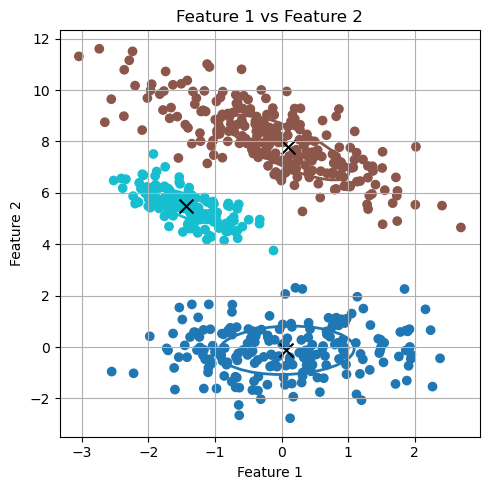

In [11]:
# Feed the sample data to the model
for z, label in zip(sample_data, sample_labels):
    model.forward(z, label)

plot_pairwise_against_first_feature(sample_data, sample_labels, model=model, N_max=1)


In [12]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

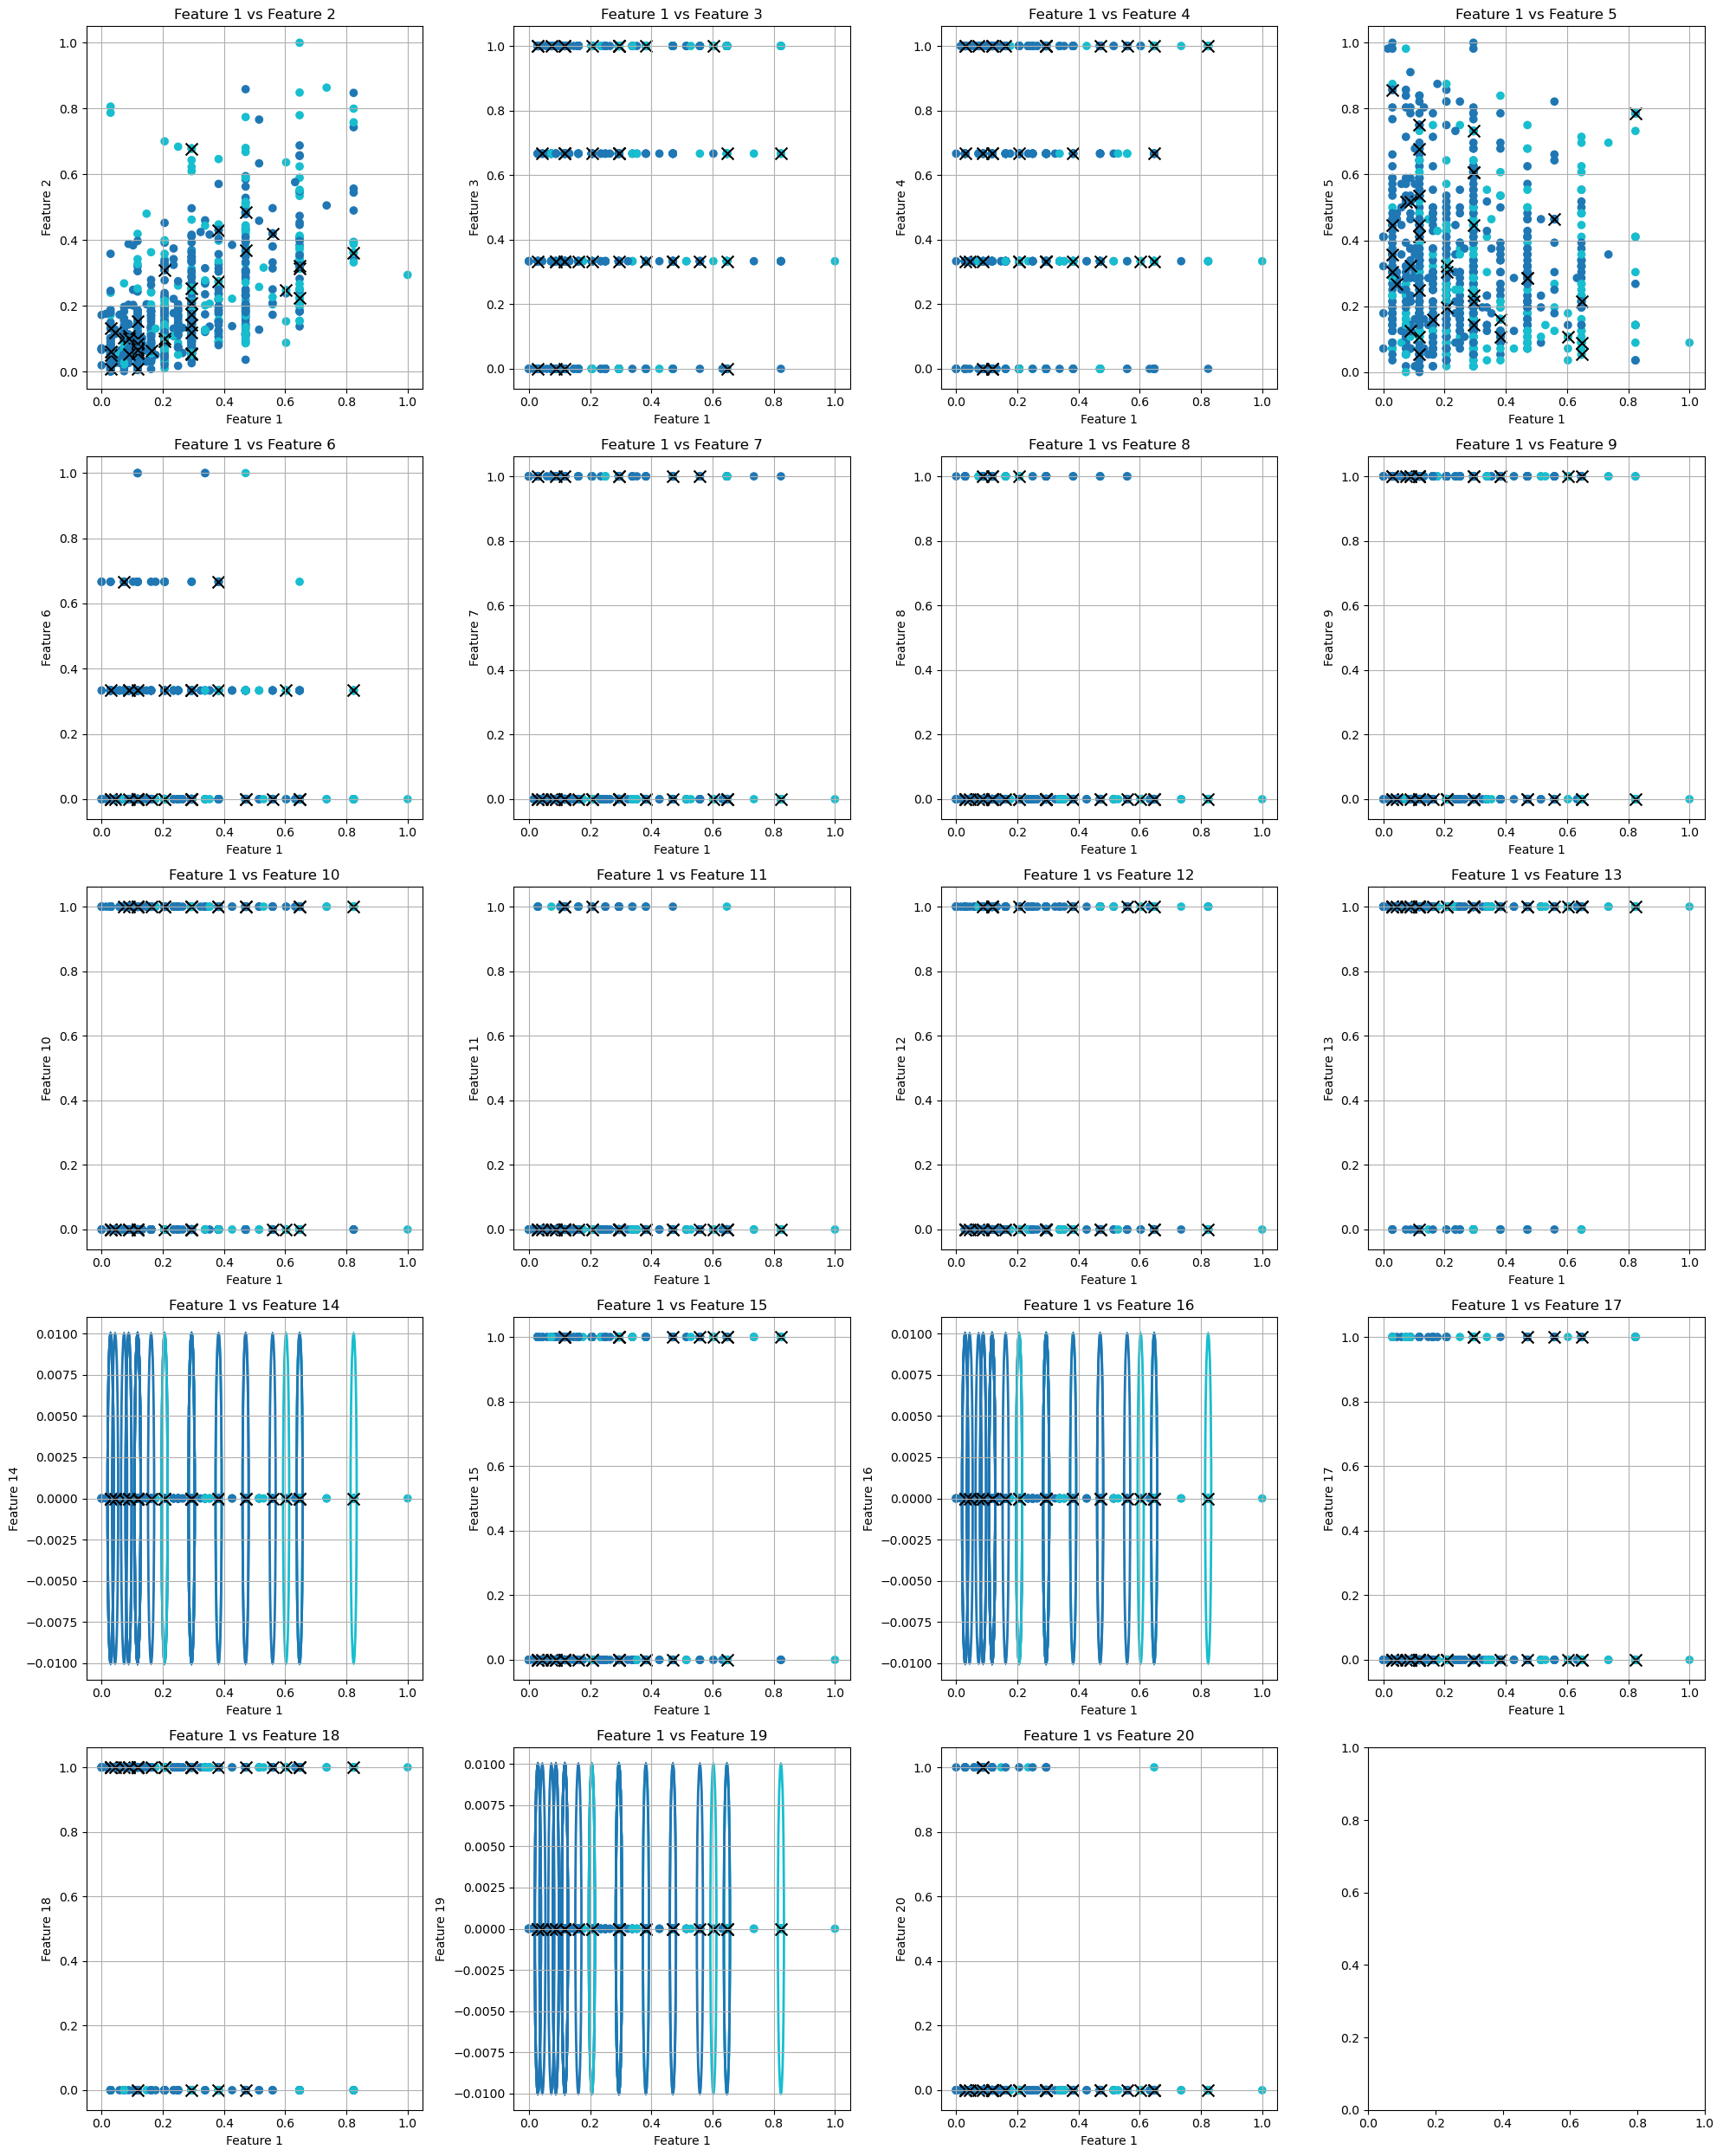

In [13]:
feature_dim = 20  # or whatever the correct value is
N_max = 1  # Maximum number of clusters, provide an appropriate value
num_sigma = 3
kappa_join = 2 # Joining parameter, provide an appropriate value
S_0 = 1e-4 # Initial potential value, provide an appropriate value
c_min = 1
num_classes = 2

# Extract labels from the y dataframe
labels = y['class'].values

# Initialize the model again
model = eGAUSSp(feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min, device)
model.to(device)


with torch.autograd.profiler.profile(use_cuda=torch.cuda.is_available()) as prof:
    # Training loop
    for idx, (point, label) in enumerate(zip(X.values, labels)):
        point_tensor = torch.tensor(point, dtype=torch.float32).to(device)
        label_tensor = torch.tensor(label, dtype=torch.float32).to(device)
        model(point_tensor, label_tensor)
        if (idx + 1) % 100 == 0:  # +1 because indexing starts from 0
            print(f"** Processed {idx + 1} points. **")
            plot_pairwise_against_first_feature(X.values, labels, model=model, N_max=0)



In [ ]:
with open("profiler_output.txt", "w") as f:
    f.write(str(prof))

In [ ]:
# Initialize counters
filtered_cluster_count = 0
filtered_cluster_samples = []

for idx in range(len(model.mu)):
    # Check if the cluster has more than N_max samples
    if model.n[idx] > N_max:
        filtered_cluster_count += 1
        filtered_cluster_samples.append(model.n[idx])

print(f"Number of clusters with more than {N_max} samples: {filtered_cluster_count}")
print(f"Sample counts for these clusters: {filtered_cluster_samples}")

Number of clusters with more than 20 samples: 0
Sample counts for these clusters: []


In [ ]:
# Initialize a dictionary to store accumulated memberships for each cluster and label
accumulated_memberships = {cluster_idx: {label: 0 for label in np.unique(y.values)} for cluster_idx in range(model.c)}

# For each sample, compute its membership degree to each cluster and accumulate
for point, label in zip(X.values, y.values.ravel()):
    gamma, _ = model.math_ops.compute_distance_and_activation(torch.tensor(point))
    gamma_values = gamma.detach().numpy()
    
    for cluster_idx in range(model.c):
        accumulated_memberships[cluster_idx][label] += gamma_values[cluster_idx]

accumulated_memberships


C:\Users\Miha\AppData\Local\Temp\ipykernel_16236\436576948.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(self.parent.n, dtype=torch.float32, device=self.device) < self.parent.N_max


RuntimeError: indices should be either on cpu or on the same device as the indexed tensor (cpu)

In [ ]:
predicted_cluster_labels = {}

for cluster_idx, memberships in accumulated_memberships.items():
    predicted_cluster_labels[cluster_idx] = max(memberships, key=memberships.get)

predicted_cluster_labels


{0: 1, 1: 1}